##### Exercise 07
##### L.H.N. WIJEWARDENA  - 190713x

Question 1

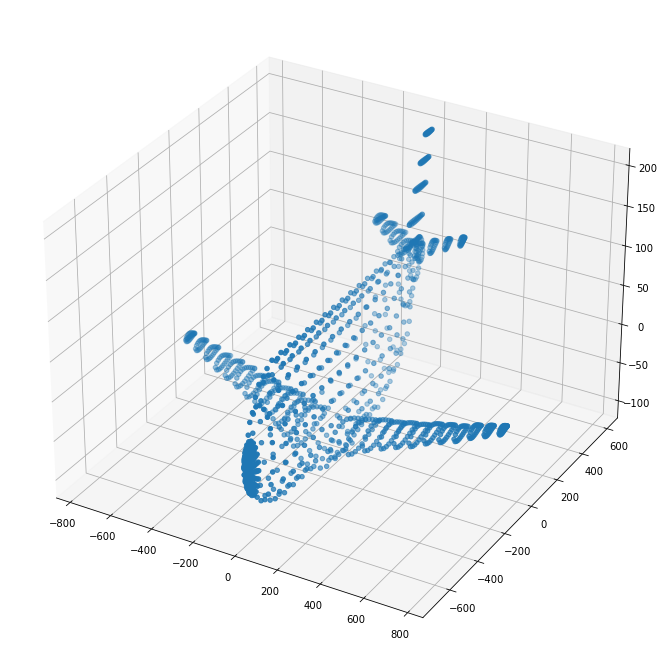

In [3]:
import numpy as np
from plyfile import PlyData,PlyElement
import matplotlib.pyplot as plt

pcd = PlyData.read(r"airplane.ply")
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0,:], points[1,:], points[2,:])

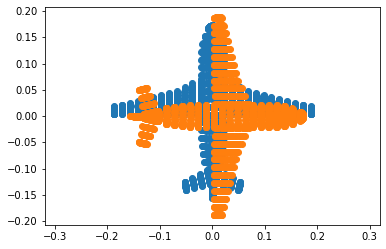

In [4]:
ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])

t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t), axis = 1)

R = np.array([[0,1,0],[1,0,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])

t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t), axis = 1)

x1 = P1 @ X
x1 = x1/x1[2,:]
x2 = P2 @ X
x2 = x2/x2[2,:]

fig,ax = plt.subplots(1,1,sharex = True, sharey = True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()

Question 3

Item  1  area in pixels = 59165
Item  1  area in mm^2 = 2319.50466
Item  2  area in pixels = 59196
Item  2  area in mm^2 = 2320.7199840000003
Item  3  area in pixels = 1
Item  3  area in mm^2 = 0.039204


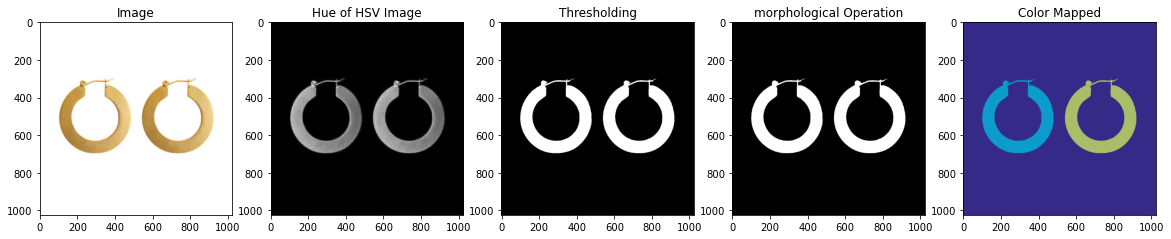

In [22]:
import cv2 as cv
import numpy as np
im = cv.imread('earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z = 720
f = 8
for i,s in enumerate(stats):
    if i != 0:
        print('Item ', i, ' area in pixels =', s[4])
        print('Item ', i, ' area in mm^2 =', s[4]*(2.2e-3)**2*(z*z)/(f*f))

cv.namedWindow('Images')
cv.imshow('Images',im)
cv.waitKey(0)
cv.imshow('Images',hsv[:,:,1])
cv.waitKey(0)
cv.imshow('Images',bw)
cv.waitKey(0)
cv.imshow('Images',opened)
cv.waitKey(0)
cv.imshow('Images',colormapped)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax = plt.subplots(1,5, figsize=(20, 20))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Image")

ax[1].imshow(cv.cvtColor(hsv[:,:,1], cv.COLOR_BGR2RGB))
ax[1].set_title("Hue of HSV Image")

ax[2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
ax[2].set_title("Thresholding")

ax[3].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
ax[3].set_title("morphological Operation")

ax[4].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
ax[4].set_title("Color Mapped")

plt.show()
